3.ใช้ข้อมูลครึ่งหนึ่งในการ classify ลูกค้า โดยใช้เกณฑ์จาก total spending และ recency จาก 
transaction ครั้งล่าสุดและ frequency ในการซื้อสินค้า เป็นกลุ่ม A,B,C และำาการสร้างแบบำาลอง 
supervised classification เพื่อให้แบำ าลอำ าการแบ่งกลุ่มของข้อมูลลูกค้าอีกครึ่งหนึ่ง

จากโจทย์
ให้แบ่ง y เป็น Class A, Class B หรือ Class C
ขึ้นอยู่กับค่า x มี 3 ค่า คือ
 x1 = Total Spendin,g 
 x2 = Recen,cy
 x3 = Frencyque
 
 จากนั้น Train Model แบ่งกลุ่มด้วย Supervised Classification Model
 โดยใช้ข้อมูลในการ Train 50%(หรือครึ่งหนึ่ง) ส่วนข้อมูลในการทำนายหรือ Test 50%(หรือครึ่งหนึ่ง)nกค้า


In [30]:
import pandas as pd
df = pd.read_csv('transaction_data_clean.csv') # Load ข้อมูลที่ Clean แล้วขึ้นมา

In [31]:
df

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,285957,6307136,Fri Jan 11 09:50:00 IST 2019,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom
...,...,...,...,...,...,...,...,...
1586007,261681,6153092,Wed Sep 19 06:23:00 IST 2018,477330,ALARM CLOCK BAKELIKE IVORY,12,5.18,Switzerland
1586008,313131,6040298,Mon Jun 18 09:18:00 IST 2018,437976,DENIM PATCH PURSE PINK BUTTERFLY,30,2.28,EIRE
1586009,295743,6387117,Sat Feb 16 09:14:00 IST 2019,484113,RECYCLED ACAPULCO MAT PINK,6,11.39,United Kingdom
1586010,324765,5945500,Fri Mar 23 06:26:00 IST 2018,470883,REGENCY CAKESTAND 3 TIER,48,15.12,United Kingdom


In [32]:
# # ดูข้อมูลของลูกค้าทั้งหมด ที่ไม่นับข้อมูลซ้ำ(ไม่นับ ID ซ้ำ) มีกี่ ID
uniqueUserId_df = df.drop_duplicates(subset='UserId')
uniqueUserId_df
# # จาก Output: มี 4,335 คน

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,285957,6307136,Fri Jan 11 09:50:00 IST 2019,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom
...,...,...,...,...,...,...,...,...
575507,269094,6213009,Sun Nov 11 08:11:00 IST 2018,484764,RABBIT NIGHT LIGHT,144,2.48,Poland
587879,363951,6188699,Sat Oct 20 07:55:00 IST 2018,470883,REGENCY CAKESTAND 3 TIER,48,15.12,United Kingdom
608547,366303,6069096,Mon Jul 16 06:47:00 IST 2018,784770,RETRO COFFEE MUGS ASSORTED,1512,1.47,Canada
640965,329028,6072660,Wed Jul 18 06:39:00 IST 2018,1783866,ANTIQUE SILVER T-LIGHT GLASS,216,1.47,United Kingdom


In [33]:
# เก็บข้อมูล TotalSpending ของแต่ละ TransactionId โดย

# สร้าง columns ใหม่ชื่อ CostPerPurchased ใน df
df['CostPerPurchased'] = df['NumberOfItemsPurchased'] * df['CostPerItem']  
# บวกรวมยอด CostPerPurchased ที่มี TransactionId เดียวกัน และเก็บไว้ใน DataFrame ใหม่ ที่ชื่อ TotalSpending_df
TotalSpending_df = df.groupby('TransactionId')['CostPerPurchased'].sum().reset_index() 
# เปลี่ยนชื่อ column ใหม่จาก CostPerPurchased': 'TotalSpending
TotalSpending_df.rename(columns={'CostPerPurchased': 'TotalSpending'}, inplace=True)

TotalSpending_df

,TransactionId,TotalSpending
0,5900015,2305.20
1,5900026,368.64
2,5900037,4622.16
3,5900048,1161.36
4,5900059,295.92
...,...,...
18403,6397413,2070.72
18404,6397424,2338.56
18405,6397435,5467.68
18406,6397446,5623.20


In [34]:
TotalSpending_df.describe()

,TransactionId,TotalSpending
count,1.840800e+04,1.840800e+04
mean,6.154670e+06,1.675108e+04
std,1.435296e+05,1.200502e+06
min,5.900015e+06,0.000000e+00
25%,6.031660e+06,2.621250e+03
50%,6.157740e+06,5.018280e+03
75%,6.279122e+06,7.730670e+03
max,6.397457e+06,1.628434e+08


In [5]:
# Copy ข้อมูล UserId จาก df มาใส่ TotalSpending_df
TotalSpending_df = pd.merge(TotalSpending_df, df[['TransactionId', 'UserId']], on='TransactionId', how='left')
TotalSpending_df
# Output: จะเห็นว่ามีจำนวนข้อมูลซ้ำที่เกิดจาก UserId

,TransactionId,TotalSpending,UserId
0,5900015,2305.20,374850
1,5900015,2305.20,374850
2,5900015,2305.20,374850
3,5900015,2305.20,374850
4,5900015,2305.20,374850
...,...,...,...
1586007,6397457,4138.08,266280
1586008,6397457,4138.08,266280
1586009,6397457,4138.08,266280
1586010,6397457,4138.08,266280


In [6]:
# ทำการลบข้อมูล TransactionId ที่ซ้ำออก
TotalSpending_df = TotalSpending_df.drop_duplicates(subset=['TransactionId'])
TotalSpending_df

,TransactionId,TotalSpending,UserId
0,5900015,2305.20,374850
28,5900026,368.64,374850
36,5900037,4622.16,273987
84,5900048,1161.36,273987
100,5900059,295.92,273987
...,...,...,...
1585836,6397413,2070.72,289317
1585844,6397424,2338.56,289317
1585852,6397435,5467.68,331884
1585936,6397446,5623.20,275373


In [7]:
# ทำการรวมยอดของแต่ละ TotalSpeding ที่มี UserId เดียวกัน
TotalSpending_df = TotalSpending_df.groupby('UserId')['TotalSpending'].sum().reset_index()
TotalSpending_df
# Output: ได้ข้อมูล x1 หรือ TotalSepding แล้ว

,UserId,TotalSpending
0,259266,1282435.20
1,259287,71518.80
2,259308,23964.48
3,259329,24175.68
4,259350,4886.40
...,...,...
4330,383880,2994.60
4331,383901,1339.20
4332,383922,2956.80
4333,383943,34681.44


In [10]:
# เปลี่ยนชนิดข้อมูลของ Column: TransactionTime ให้เป็นชนิด datetime
df['TransactionTime'] = pd.to_datetime(df['TransactionTime'])

C:\Users\user\AppData\Local\Temp\ipykernel_14588\1800471233.py:2: FutureWarning: Parsed string "Sat Feb 02 12:50:00 IST 2019" included an un-recognized timezone "IST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['TransactionTime'] = pd.to_datetime(df['TransactionTime'])


In [11]:
df

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,CostPerPurchased
0,278166,6355745,2019-02-02 12:50:00,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,70.38
1,337701,6283376,2018-12-26 09:06:00,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,10.56
2,267099,6385599,2019-02-15 09:45:00,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,64.80
3,380478,6044973,2018-06-22 07:14:00,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,5.19
4,285957,6307136,2019-01-11 09:50:00,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom,42.24
...,...,...,...,...,...,...,...,...,...
1586007,261681,6153092,2018-09-19 06:23:00,477330,ALARM CLOCK BAKELIKE IVORY,12,5.18,Switzerland,62.16
1586008,313131,6040298,2018-06-18 09:18:00,437976,DENIM PATCH PURSE PINK BUTTERFLY,30,2.28,EIRE,68.40
1586009,295743,6387117,2019-02-16 09:14:00,484113,RECYCLED ACAPULCO MAT PINK,6,11.39,United Kingdom,68.34
1586010,324765,5945500,2018-03-23 06:26:00,470883,REGENCY CAKESTAND 3 TIER,48,15.12,United Kingdom,725.76


In [12]:
# สร้าง column ใหม่ชื่อ Recency เป็นข้อมูลวันที่ปัจจุบัน - วันที่ ณ ที่เกิด TransactionTime (ยิ่งเลขน้อยแปลว่าวันที่ซื้อของเพิ่งเกิดได้ไม่นาน)
df['Recency'] = (pd.to_datetime('now') - df['TransactionTime']).dt.days

In [13]:
df

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,CostPerPurchased,Recency
0,278166,6355745,2019-02-02 12:50:00,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,70.38,1753
1,337701,6283376,2018-12-26 09:06:00,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,10.56,1791
2,267099,6385599,2019-02-15 09:45:00,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,64.80,1740
3,380478,6044973,2018-06-22 07:14:00,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,5.19,1978
4,285957,6307136,2019-01-11 09:50:00,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom,42.24,1775
...,...,...,...,...,...,...,...,...,...,...
1586007,261681,6153092,2018-09-19 06:23:00,477330,ALARM CLOCK BAKELIKE IVORY,12,5.18,Switzerland,62.16,1889
1586008,313131,6040298,2018-06-18 09:18:00,437976,DENIM PATCH PURSE PINK BUTTERFLY,30,2.28,EIRE,68.40,1982
1586009,295743,6387117,2019-02-16 09:14:00,484113,RECYCLED ACAPULCO MAT PINK,6,11.39,United Kingdom,68.34,1739
1586010,324765,5945500,2018-03-23 06:26:00,470883,REGENCY CAKESTAND 3 TIER,48,15.12,United Kingdom,725.76,2069


In [14]:
# สร้าง DataFrame ใหม่ชื่อ recency_df เก็บข้อมูลจาก column: Recency เลือกค่าที่น้อยทึ่สุด(ค่า min) โดยอ้างอิงจาก UserId 
recency_df = df.groupby('UserId')['Recency'].min().reset_index()

In [15]:
# ได้ x2 คือ recency
recency_df

,UserId,Recency
0,259266,2060
1,259287,-1550
2,259308,1810
3,259329,1753
4,259350,2045
...,...,...
4330,383880,2012
4331,383901,1915
4332,383922,1742
4333,383943,1738


In [17]:
# สร้าง DataFrame ใหม่ ชื่อ merged_df รวมข้อมูลจาก TotalSpending_dfและ recency_df ไว้ด้วยกัน โดยอ้างอิงจาก UserId
merged_df = pd.merge(TotalSpending_df, recency_df, on='UserId')

In [18]:
merged_df

,UserId,TotalSpending,Recency
0,259266,1282435.20,2060
1,259287,71518.80,-1550
2,259308,23964.48,1810
3,259329,24175.68,1753
4,259350,4886.40,2045
...,...,...,...
4330,383880,2994.60,2012
4331,383901,1339.20,1915
4332,383922,2956.80,1742
4333,383943,34681.44,1738


In [19]:
# เก็บข้อมูล x3 (Frequency)
Frequency_df = df.groupby('UserId')['TransactionId'].nunique().reset_index()
Frequency_df.columns = ['UserId', 'Frequency']
Frequency_df

,UserId,Frequency
0,259266,1
1,259287,7
2,259308,4
3,259329,1
4,259350,1
...,...,...
4330,383880,1
4331,383901,1
4332,383922,2
4333,383943,16


In [20]:
# นำ Frequency_df รวมเข้าใน merged_df
merged_df = pd.merge(merged_df, Frequency_df, on='UserId')
merged_df
# ตอนนี้ได้ข้อมูล x1(TotalSpending), x2(Recency) และ x3(Frequency) ใน DataFrame เดียวกันแล้ว

,UserId,TotalSpending,Recency,Frequency
0,259266,1282435.20,2060,1
1,259287,71518.80,-1550,7
2,259308,23964.48,1810,4
3,259329,24175.68,1753,1
4,259350,4886.40,2045,1
...,...,...,...,...
4330,383880,2994.60,2012,1
4331,383901,1339.20,1915,1
4332,383922,2956.80,1742,2
4333,383943,34681.44,1738,16


In [21]:
# ตรวจสอบความผิดปกติของข้อมูล
merged_df.describe()
# จาก Output: จะเห็นว่าข้อมูลของ Column:Recency ติดลบ (โดยดูจากค่า min)

,UserId,TotalSpending,Recency,Frequency
count,4335.000000,4.335000e+03,4335.000000,4335.000000
mean,321274.388235,7.113124e+04,1776.892042,4.246367
std,36163.576722,2.477213e+06,422.316074,7.643880
min,259266.000000,0.000000e+00,-1550.000000,1.000000
25%,290041.500000,5.077920e+03,1752.000000,1.000000
50%,321237.000000,1.108812e+04,1785.000000,2.000000
75%,352348.500000,2.710608e+04,1875.000000,5.000000
max,384027.000000,1.628434e+08,2108.000000,206.000000


In [22]:
# หาแถวที่ข้อมูลมีค่าติดลบ ของ column: Recency
problem_idx = merged_df[(merged_df.Recency < 0 ) ].index
problem_idx

Index([   1,  176,  245,  272,  326,  389,  481,  627,  852,  913, 1046, 1055,
       1065, 1079, 1134, 1194, 1318, 1348, 1422, 1466, 1711, 1754, 1758, 1877,
       1936, 1947, 1952, 1984, 2000, 2077, 2209, 2427, 2569, 2584, 2610, 2652,
       2723, 2740, 2771, 2846, 2893, 2900, 2947, 3247, 3340, 3375, 3420, 3476,
       3566, 3606, 3703, 3726, 3743, 3752, 3769, 3828, 3846, 3892, 3928, 3940,
       4053, 4093, 4162, 4198, 4211],
      dtype='int64')

In [23]:
# ลบข้อมูลที่ติดลบของ column: Recency
problem_idx = merged_df[(merged_df.Recency < 0 ) ].index
merged_df.drop(problem_idx, inplace=True)

In [24]:
# ข้อมูลที่ Clean แล้ว
merged_df

,UserId,TotalSpending,Recency,Frequency
0,259266,1282435.20,2060,1
2,259308,23964.48,1810,4
3,259329,24175.68,1753,1
4,259350,4886.40,2045,1
5,259392,22985.76,1771,7
...,...,...,...,...
4330,383880,2994.60,2012,1
4331,383901,1339.20,1915,1
4332,383922,2956.80,1742,2
4333,383943,34681.44,1738,16


C:\ProgramData\anaconda3\envs\tf\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      UserId  TotalSpending  Recency  Frequency  Cluster
0     259266     1282435.20     2060          1        2
2     259308       23964.48     1810          4        0
3     259329       24175.68     1753          1        0
4     259350        4886.40     2045          1        2
5     259392       22985.76     1771          7        0
...      ...            ...      ...        ...      ...
4330  383880        2994.60     2012          1        2
4331  383901        1339.20     1915          1        2
4332  383922        2956.80     1742          2        0
4333  383943       34681.44     1738         16        0
4334  384027       30516.48     1777          3        0

[4270 rows x 5 columns]


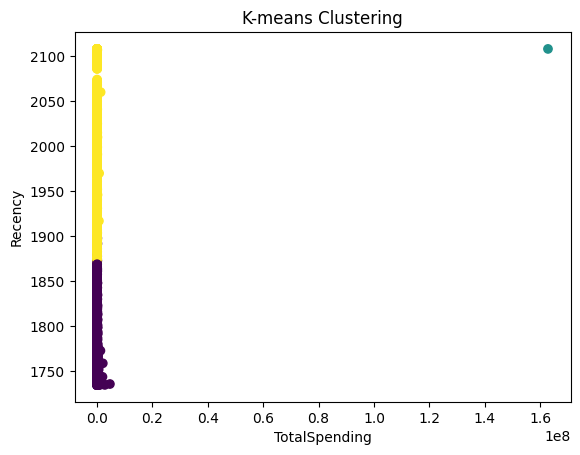

In [26]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# ปรับสเกลของข้อมูลแต่ละ column ให้อยู่ในช่วงเดียวกัน (0-1)
scaler = StandardScaler()
X = scaler.fit_transform(merged_df[['TotalSpending', 'Recency', 'Frequency']])

# กำหนดจำนวน Cluster ที่ต้องการแบ่งกลุ่ม จากโจทย์ต้องการ 3 กลุ่ม (หรือแบ่ง y ออกเป็น 3 class: A, B, C)
n_clusters = 3

# ใช้ K-means clustering ในการช่วงแบ่งกลุ่มให้
kmeans = KMeans(n_clusters=n_clusters, random_state=1)
merged_df['Cluster'] = kmeans.fit_predict(X)

# Display the clustered DataFrame
print(merged_df)

# Plot graph scatter ระหว่าง TotalSpending กับ Recency
plt.scatter(merged_df['TotalSpending'], merged_df['Recency'], c=merged_df['Cluster'], cmap='viridis')
plt.xlabel('TotalSpending')
plt.ylabel('Recency')
plt.title('K-means Clustering')
plt.show()
# จาก Output: จะเห็นได้ว่าสามารถแยกกลุ่มข้อมูลได้ชัดเจน

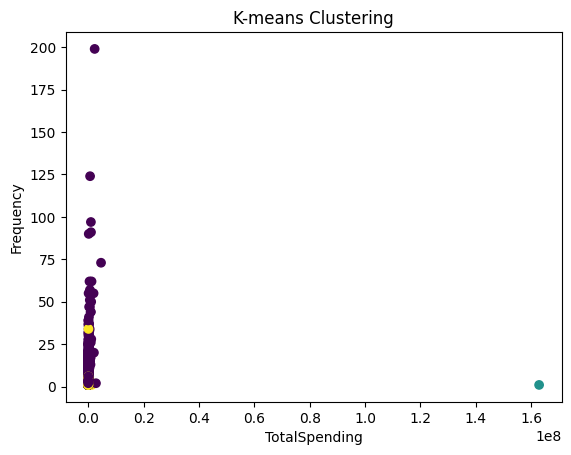

In [27]:
# Plot graph scatter ระหว่าง TotalSpending กับ Frequency
plt.scatter(merged_df['TotalSpending'], merged_df['Frequency'], c=merged_df['Cluster'], cmap='viridis')
plt.xlabel('TotalSpending')
plt.ylabel('Frequency')
plt.title('K-means Clustering')
plt.show()
# จาก Output: จะเห็นได้ว่าสามารถแยกกลุ่มข้อมูลได้ไม่ชัดเจน

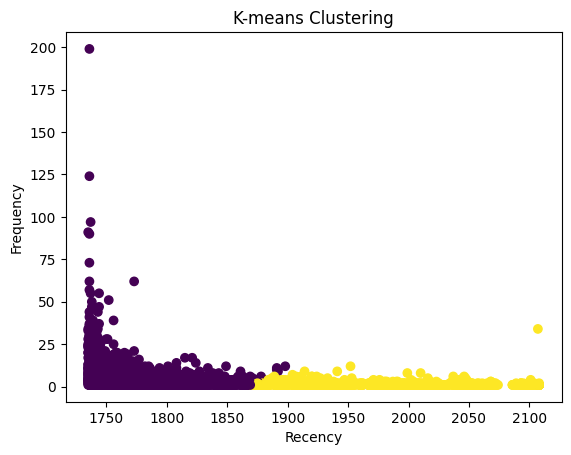

In [28]:
# Plot graph scatter ระหว่าง Recency กับ Frequency
plt.scatter(merged_df['Recency'], merged_df['Frequency'], c=merged_df['Cluster'], cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('K-means Clustering')
plt.show()
# จาก Output: จะเห็นได้ว่าสามารถแยกกลุ่มข้อมูลได้ชัดเจน

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report



# กำหนดข้อมูล X, y 
X = merged_df[['TotalSpending', 'Recency', 'Frequency']]
y = merged_df['Cluster']

# แบ่งข้อมูลสำหรับ Train และ Test ออกเป็นอย่างละ 50%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

# ใช้ function decision tree classifier ในการช่วย Train Model
clf = DecisionTreeClassifier(random_state=1)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)
# จาก Output: ค่าความแม่นยำของ Model (Accuracy) ได้ = 1 หรือ 100% แปลว่าถ้าให้ค่า x ทั้ง 3 ค่า เข้าไป Model จะสามารถทำนายค่า y ได้แม่นยำ

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1621
           1       0.00      0.00      0.00         1
           2       0.99      1.00      0.99       513

    accuracy                           1.00      2135
   macro avg       0.66      0.66      0.66      2135
weighted avg       1.00      1.00      1.00      2135



C:\ProgramData\anaconda3\envs\tf\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\envs\tf\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\envs\tf\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
